# Machine Learning Coursera
Link [here](https://www.coursera.org/learn/machine-learning) to the course.

## Preface
Just some general words on what am I doing. Since I want to practice python and machine learning (besides my other side projects and courses I am taking) what better way than re-writing all of the exercises from Coursera's famous Machine Learning course by Andrew Ng in Python.

## Programming Exercise 1: Linear Regression

**Setup**

In [13]:
# Setup Code
import numpy as np
import matplotlib.pyplot as plt
# For that Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


data = np.loadtxt('ex1data1.txt',delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = len(y)

**Plotting**

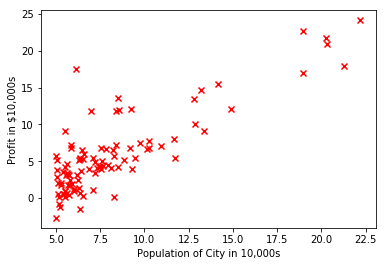

In [14]:
plt.scatter(X,y, color='r', marker='x')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s')
plt.show()

### 1. Linear regression with one variable
**Gradient Descent**

In [15]:
# Adding a column of ones to X
Xgd = np.transpose(np.matrix((np.ones(m), X)))
Ygd = y.reshape((m,1)) # probably should do this at the beginning
# Initializing Theta
theta_gd = np.zeros(2)

# Intial Parameters, used for GD
iterations = 1500
alpha_gd = 0.01

# print y.reshape((m,1))
# And now the cost function
# which I will separate in a function to keep the consistency
def compute_cost(x, y, theta):
    # Calculating the Cost
    J = 1.0 / (2 * m) * sum(np.power((theta[0]*x[:,0] + theta[1]*x[:,1] - y),2))
    return J

def gradient_descent(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    
    for i in range(0,num_iters):
        theta_1_temp = theta[0] - alpha / m * sum(np.multiply((theta[0] * x[:,0] + theta[1] * x[:,1] - y), x[:,0]))
        theta_2_temp = theta[1] - alpha / m * sum(np.multiply((theta[0] * x[:,0] + theta[1] * x[:,1] - y), x[:,1]))
        theta[0] = theta_1_temp
        theta[1] = theta_2_temp
        # Updating the cost
        J_history[i] = compute_cost(x, y, theta)

        
    
    return theta, J_history
            
cost = compute_cost(Xgd, Ygd, theta_gd)
print "Initial cost: " + str(cost)
theta_gd, cost_gd = gradient_descent(Xgd, Ygd, theta_gd, alpha_gd, iterations)
print "Gradient Descent Thetas: " + str(theta_gd)

Initial cost: [[ 32.07273388]]
Gradient Descent Thetas: [-3.63029144  1.16636235]


**Verifying that gradient descent is working correctly**

Plotting the cost function vs the number of iterations, and if the cost is decreasing - it is implemented correct.

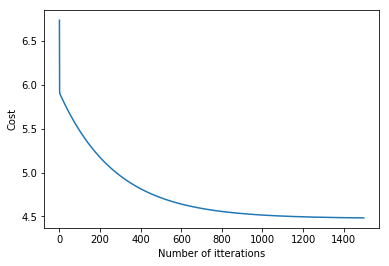

In [18]:
plt.plot(range(0, iterations), cost_gd)
plt.xlabel('Number of itterations')
plt.ylabel('Cost')
plt.show()

** Plotting the linear fit**

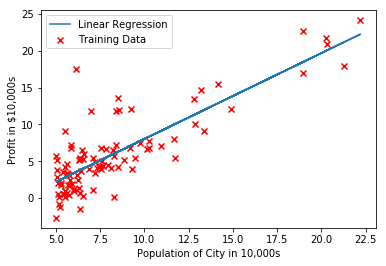

In [17]:
plt.scatter(X,y, color='r', marker='x', label='Training Data')
plt.plot(Xgd[:, 1],np.dot(Xgd,theta_gd).T, label='Linear Regression')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s')
plt.legend(loc='upper left')
plt.show()

**Predicting values for population sizes of 35,000 and 70,000**

In [19]:
predict1 = np.dot([1, 3.5], theta_gd)
predict2 = np.dot([1, 7], theta_gd)

In [20]:
print 'For a poulation of 35,000 we preict a profit of %f' % (predict1 * 10000)
print 'For a poulation of 70,000 we preict a profit of %f' % (predict2 * 10000)

For a poulation of 35,000 we preict a profit of 4519.767868
For a poulation of 70,000 we preict a profit of 45342.450129


**Surface Plot**

1 Getting the whole surface values:

In [69]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

ta, tb = np.meshgrid(theta0_vals, theta1_vals)

ar_size = (len(theta0_vals), len(theta1_vals))


for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = compute_cost(Xgd, Ygd, t)

J_vals = J_vals.T

2 Plotting - inverse for now

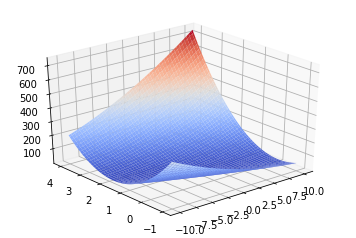

In [78]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(ta, tb, J_vals,
                          cmap=cm.coolwarm, linewidth=0)

ax.view_init(azim=-130)

plt.show()

**Contour Plot**

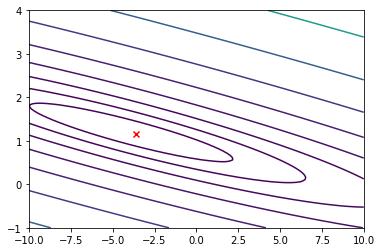

In [85]:
cp = plt.figure()
cntr = plt.contour(ta, tb, J_vals, np.logspace(-2,3,20))
xval = plt.scatter(theta_gd[0], theta_gd[1], color='r', marker='x')

plt.show()